In [2]:
import cv2
import numpy as np

# Resmi açmak için dosya yolunu belirtin
image_path = "Data/Resim2_3.jpg"

# Resmi açın
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [31]:
# Resmi açmak için dosya yolunu belirtin
filter_path = "Data/filter3.jpg"

# Resmi açın
filter = cv2.imread(filter_path)
filter = cv2.cvtColor(filter, cv2.COLOR_BGR2GRAY)

In [42]:
filter = filter - filter.mean()

dtype('uint8')

dtype('uint8')

In [52]:
import numpy as np
from scipy import signal
rng = np.random.default_rng()
face = image- image.mean()
template = np.copy(filter.astype("float64"))
template -= template.mean()
face = face + rng.standard_normal(face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match

In [25]:
cv2.imshow("Image2", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

/tmp/ipykernel_5150/648862807.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


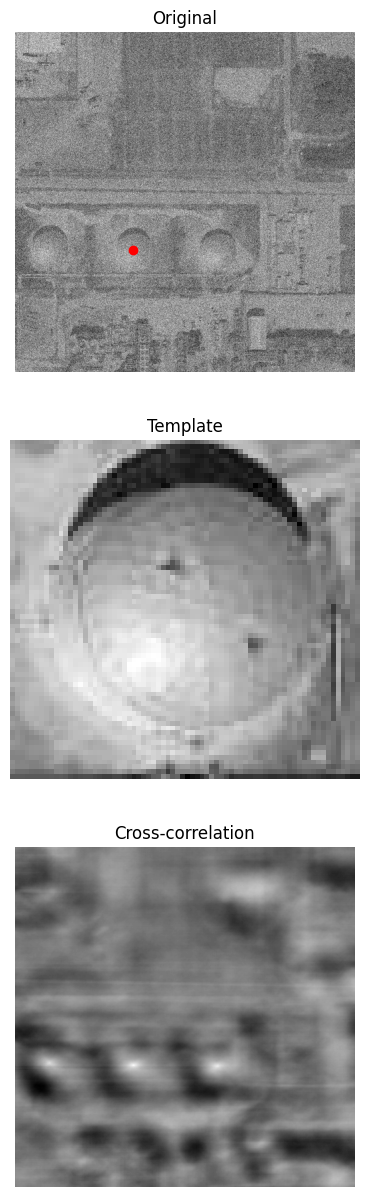

In [53]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Resmi açmak için dosya yolunu belirtin
image_path = "Data/Resim2_3.jpg"

# Resmi açın
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

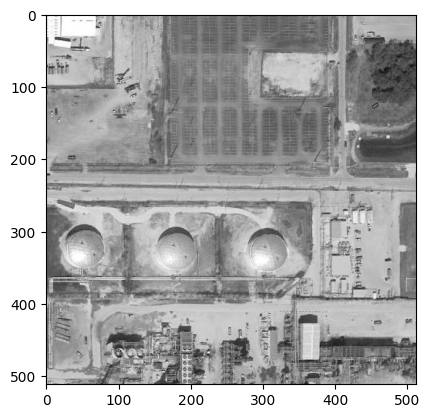

In [3]:
%matplotlib inline

img_blur = cv2.medianBlur(image, 5)
plt.imshow(image, cmap='gray')
plt.show()

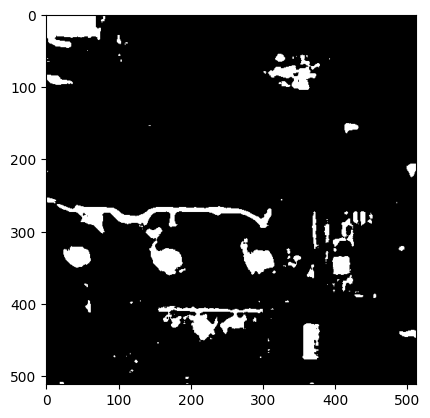

In [4]:

%matplotlib inline

_, img_thresh = cv2.threshold(img_blur, 200, 255, cv2.THRESH_BINARY)
plt.imshow(img_thresh, cmap='gray')
plt.show()

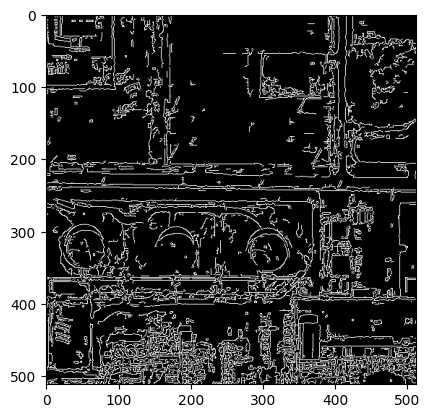

In [47]:
%matplotlib inline

edges = cv2.Canny(image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.show()

In [32]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

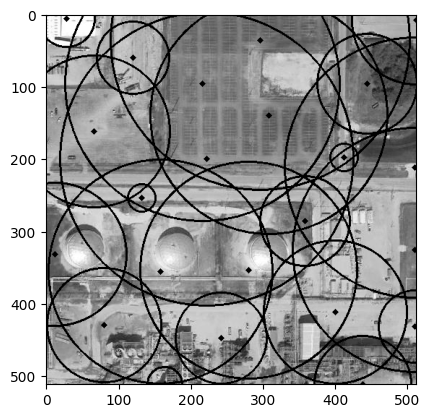

In [51]:
%matplotlib inline
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 100,
                           param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))

ILImage = image.copy()
for i in circles[0,:]:
    # Daireyi çizdir
    cv2.circle(ILImage,(i[0],i[1]),i[2],(0,255,0),2)
    # Merkez noktasını çizdir
    cv2.circle(ILImage,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(ILImage, cmap='gray')
plt.show()

In [55]:
edges = cv2.Canny(image, 100, 200)
cv2.imshow('edges', edges)
cv2.waitKey(0)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20,param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Daireyi çizdir
    cv2.circle(image,(i[0],i[1]),i[2],(0,255,0),2)
    # Merkez noktasını çizdir
    cv2.circle(image,(i[0],i[1]),2,(0,0,255),3)

# Resmi göster
cv2.imshow('houghTransform', image)
cv2.waitKey(0)

27

: 